In [1]:
import tensorflow as tf
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [4]:
cap = cv2.VideoCapture(1)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    start_time = time.time()
    end_time = start_time + 10
    
    while cap.isOpened() and time.time()<end_time:

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [5]:
draw_landmarks(frame, results)

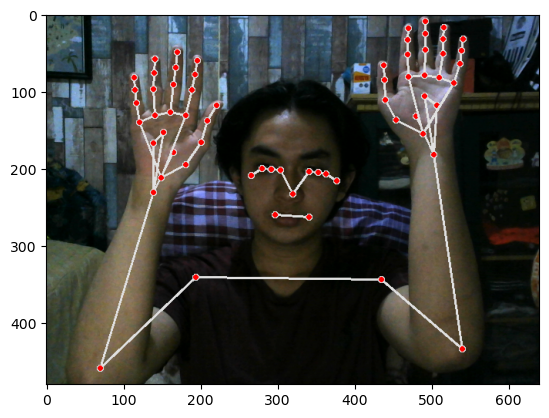

In [6]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [7]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [8]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [10]:
result_test = extract_keypoints(results)

In [11]:
np.save('0', result_test)
np.load('0.npy')

array([ 5.00888288e-01,  4.85485613e-01, -7.59693623e-01,  9.99988437e-01,
        5.33601880e-01,  4.26416904e-01, -7.03022718e-01,  9.99970078e-01,
        5.51646531e-01,  4.28980410e-01, -7.02705026e-01,  9.99968171e-01,
        5.67679763e-01,  4.32079256e-01, -7.02138066e-01,  9.99965549e-01,
        4.75444615e-01,  4.21468049e-01, -6.67680144e-01,  9.99967039e-01,
        4.57172096e-01,  4.19948101e-01, -6.67232215e-01,  9.99961019e-01,
        4.38770294e-01,  4.18568015e-01, -6.67124689e-01,  9.99961197e-01,
        5.89891076e-01,  4.51286256e-01, -3.80375564e-01,  9.99971628e-01,
        4.16503191e-01,  4.35565025e-01, -2.01278374e-01,  9.99974012e-01,
        5.33281326e-01,  5.49399376e-01, -6.49302125e-01,  9.99959588e-01,
        4.64939207e-01,  5.42142034e-01, -5.99557757e-01,  9.99965012e-01,
        6.80049300e-01,  7.18523681e-01, -2.90165395e-01,  9.99493778e-01,
        3.04340512e-01,  7.11034596e-01,  6.59434795e-02,  9.99270201e-01,
        8.45239997e-01,  

In [12]:
actions = np.array(['Z']) #
no_sequences = 30

sequence_length = 30

start_folder = 30

DATA_PATH = (r"C:\Users\victus\Documents\SignLanguage\MotionDetectionforSIBIv2\Dataset") 

In [13]:
import os

directory_path = r"C:\Users\victus\Documents\SignLanguage\MotionDetectionforSIBIv2\Dataset"

doc = []

for root, dirs, files in os.walk(directory_path):
    doc.extend(dirs)
    break 
print(doc)

['apa', 'bagaimana', 'berapa', 'boleh', 'dia', 'F', 'halo', 'I', 'J', 'K', 'kami', 'kamu', 'kapan', 'kita', 'mana', 'mereka', 'nama', 'saya', 'siapa']


In [14]:
for action in actions: 
    path = os.path.join(DATA_PATH, action)
    if not os.path.exists(path):
        os.makedirs(path)
    dirlist = os.listdir(path)
    if len(dirlist) == 0:
        dirmax = 0
    else:
        dirmax = np.max(np.array(dirlist).astype(int))

In [15]:
cap = cv2.VideoCapture(1)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(1, no_sequences+1):
            subdir = dirmax + sequence
            subdir_path = os.path.join(DATA_PATH, action, str(subdir))
            os.makedirs(subdir_path, exist_ok=True)
            
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)

                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
   
                    cv2.imshow('OpenCV Feed', image)
            
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(subdir_path, '{}_keypoints_{}.npy'.format(action, frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()